# **Ferramentas Computacionais para Soluções de Problemas de Engenharia**

Algoritmos Genéticos - Problema da Mochila Valiosa

Prof. Flávio da Silva Vitorino Gomes

DEER/CEAR/UFPB


# Importação de Pacotes

In [295]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

# Configuração de Parâmetros

*item_number* - Quantidade de itens disponíveis para inclusão na mochila (genes).

*weigth* - Peso de cada item disponível para levar.

*value* - Valor de cada item disponível para levar.



In [296]:
item_number = np.arange(1,11)
weight = np.array([10,8,2,4,15,5,3,1,12,9])                       # weight = np.random.randint(1, 15, size = 10)
value = np.array([1200,200,300,1000,1500,800,2000,40,500,3000])  # value = np.random.randint(10,3000, size = 10)              
# df_item = pd.DataFrame(index=item_number, )
print('Lista de itens da casa com seus respectivos valores e pesos:')
print('Item No.   Peso   Valor')
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}\n'.format(item_number[i], weight[i], value[i]))

Lista de itens da casa com seus respectivos valores e pesos:
Item No.   Peso   Valor
1          10         1200

2          8         200

3          2         300

4          4         1000

5          15         1500

6          5         800

7          3         2000

8          1         40

9          12         500

10          9         3000



*knapsack_threshold* - Peso máximo permitido na mochila (restrição da função-objetivo).

*solutions_per_pop* - Quantidade de individuos (população) por geração.

*num_generations* - Quantidade de gerações (evoluções).

*num_parents* - Quantidade de pais que passam para a próxima geração.

*num_offsprings* - Quantidade de filhos gerados a cada nova geração.

*crossover_rate* - Taxa de ocorrência para um casal de pais conseguir reproduzir.

*mutation_rate* - Taxa de ocorrência para um filho sofre mutação ao nascer.

In [297]:
knapsack_threshold = 35 
solutions_per_pop = 8
num_generations = 1000
num_parents = 2
num_offsprings = solutions_per_pop - num_parents
crossover_rate = 0.9
mutation_rate = 0.5

In [298]:
# Comandos de Ajuda no Jupyter /Google Colaboratory
#help(np.arange)
#help(np.array)
#help(np.random.randint)

# População Inicial (aleatória)

*pop_size* - Tamanho da Matriz (quantidade de individuos por geração x genes).

*initial_population* - População inicial gerada de forma aleatória.

In [299]:
pop_size = (solutions_per_pop, item_number.shape[0])
print('Tamanho da População = {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
#initial_population = initial_population.astype(int)
print('População Inicial: \n{}'.format(initial_population))

Tamanho da População = (8, 10)
População Inicial: 
[[1 0 1 1 1 0 1 0 1 0]
 [0 0 0 1 0 1 1 1 1 1]
 [1 0 1 1 0 1 1 0 0 1]
 [1 1 1 1 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 1 0 1]
 [0 1 1 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 1 1 0 0]
 [1 0 0 1 0 1 1 1 1 0]]


# Teste de Aptidão (Fitness)


*cal_fitness* - Função que calcula a aptidão de cada indivíduo.

*fitness* - Array contendo as aptidões calculadas para cada indivíduo da população testada.

In [300]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness              

In [301]:
# Comandos de Ajuda no Jupyter /Google Colaboratory
#help(range)

# Seleção

*selection* - Função que escolhe os pais mais aptos para reprodução naquela geração.

*parents* - Array ordenada, por aptidão(melhor para pior), dos pais daquela geração.

In [302]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [303]:
# Comandos de Ajuda no Jupyter /Google Colaboratory
#help(np.where)
#help(np.max)

# Cruzamento

*crossover* - Função que cruza os pais mais aptos para reprodução naquela geração.

*crossover_point* - Ponto de  os pais mais aptos para reprodução naquela geração.

*offsprings* - Filhos que foram gerados naquela geração.

In [304]:
def crossover(parents, num_offsprings, crossover_rate):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    i=0
    while (i < num_offsprings):
      x = rd.random()
      parent1_index = 0
      parent2_index = 1
      if x < crossover_rate:
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        offsprings[i+1,0:crossover_point] = parents[parent2_index,0:crossover_point]
        offsprings[i+1,crossover_point:] = parents[parent1_index,crossover_point:]
      else:
        offsprings[i] = parents[parent1_index]
        offsprings[i+1] = parents[parent2_index]
      i+=2 
        
    return offsprings   

# Mutação

*mutation* - Função que realiza uma mutação aleatória em um filho com base em uma probalibidade definida.

*mutants* - Filho que sofreu alguma mutação.


In [305]:
def mutation(offsprings, mutation_rate):
    mutants = np.empty((offsprings.shape))
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value < mutation_rate:
          int_random_value = randint(0,offsprings.shape[1]-1)    
          if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
          else :
            mutants[i,int_random_value] = 0
    return mutants   

# Otimizador de Gerações

*optimize* - Função que aglomera todas as etapas do processo de evolução na quantidade de gerações determinada.

*parameters* - População resultante a cada geração a partir da segunda.

*fitness_history* - Aptidão dos indivíduos ao longo das gerações.

In [306]:
def optimize(weight, value, population, pop_size, num_generations, knapsack_threshold, num_parents, num_offsprings, crossover_rate, mutation_rate):
    parameters, fitness_history = [], []
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, knapsack_threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings, crossover_rate)
        mutants = mutation(offsprings, mutation_rate)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Última geração: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, knapsack_threshold)      
    print('Fitness da última geração: {}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

# Evolução

In [307]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, 
                                       knapsack_threshold, num_parents, num_offsprings, crossover_rate, mutation_rate)
print(f'Os itens selecionados que resultam no maior valor são: {list(parameters[0])}\n')
print(f'Peso total da melhor escolha: {(np.sum(parameters * weight))}')

Última geração: 
[[1 0 1 1 0 1 1 1 0 1]
 [1 0 1 1 0 1 1 1 0 1]
 [1 0 1 1 0 1 0 1 0 1]
 [1 0 1 1 0 1 1 1 0 1]
 [1 0 1 1 0 1 1 0 0 1]
 [1 0 1 1 0 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 0 1]
 [1 0 1 1 0 1 1 1 0 1]]

Fitness da última geração: [8340. 8340. 6340. 8340. 8300. 8340. 7540. 8340.]

Os itens selecionados que resultam no maior valor são: [1, 0, 1, 1, 0, 1, 1, 1, 0, 1]

Peso total da melhor escolha: 34


# Gráficos

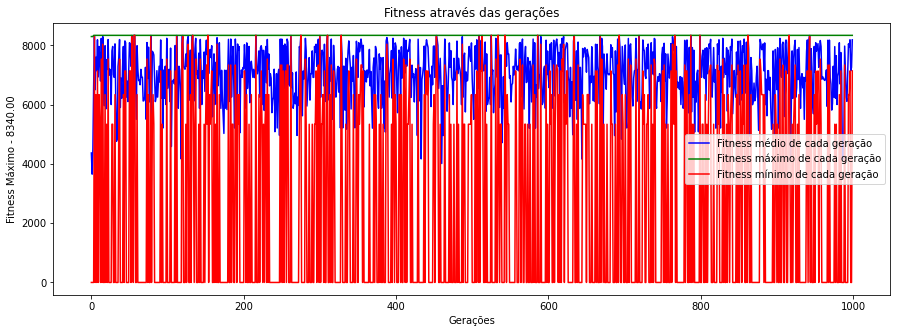

In [308]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
fitness_history_min = [np.min(fitness) for fitness in fitness_history]
plt.figure(figsize=(15,5),facecolor="w")
plt.plot(list(range(num_generations)), fitness_history_mean,'b', label = 'Fitness médio de cada geração')
plt.plot(list(range(num_generations)), fitness_history_max, 'g', label = 'Fitness máximo de cada geração')
plt.plot(list(range(num_generations)), fitness_history_min, 'r', label = 'Fitness mínimo de cada geração')
plt.legend()
plt.title('Fitness através das gerações')
plt.xlabel('Gerações')
plt.ylabel(f'Fitness Máximo - {max(fitness_history_max):6.2f}')
plt.show()

# Mesma busca sendo totalmente aleatória

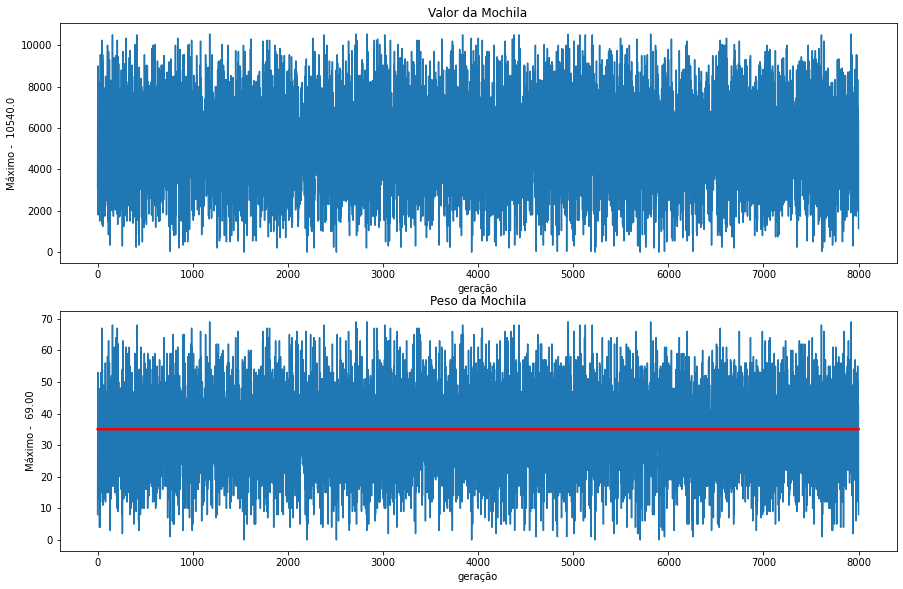

In [309]:
num_points = solutions_per_pop*num_generations    #(8 individuos x 50 geracoes)
inputs = np.random.randint(2, size = (num_points,10))   
y_value=[]   # valor da mochila
y_weight=[]  # peso da mochila
for i in range(len(inputs)):
  y_value.append(value[0]*inputs[i][0]+value[1]*inputs[i][1]+value[2]*inputs[i][2]+value[3]*inputs[i][3]+value[4]*inputs[i][4]+value[5]*inputs[i][5]+value[6]*inputs[i][6]+value[7]*inputs[i][7]+value[8]*inputs[i][8]+value[9]*inputs[i][9])
  y_weight.append(weight[0]*inputs[i][0]+weight[1]*inputs[i][1]+weight[2]*inputs[i][2]+weight[3]*inputs[i][3]+weight[4]*inputs[i][4]+weight[5]*inputs[i][5]+weight[6]*inputs[i][6]+weight[7]*inputs[i][7]+weight[8]*inputs[i][8]+weight[9]*inputs[i][9])
#print(max(y_value))
plt.figure(figsize=(15,15),facecolor="w")
plt.subplot(3,1,1)
plt.plot(y_value)
plt.title('Valor da Mochila')
plt.ylabel(f'Máximo - {max(y_value):8.1f}')
plt.xlabel('geração')
plt.subplot(3,1,2)
plt.plot(y_weight)
plt.plot(knapsack_threshold*np.ones([num_points,10]),color='red')
plt.title('Peso da Mochila')
plt.ylabel(f'Máximo - {max(y_weight):6.2f}')
plt.xlabel('geração')
plt.show()